In [1]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
os.getcwd()

'/Users/pooja/CapStone_Project'

In [3]:
os.listdir()

['Data_Dictionary.xlsx',
 'sample_submission_6ZSOdab.xlsx',
 'train.xlsx',
 'submission.csv',
 'submission_UTube.csv',
 'submission88.csv',
 'submission_LR1.csv',
 'submission_UTube(Final).csv',
 'submission_RF.csv',
 'td4_outliers_handled.csv',
 'Credit_Prediction.ipynb',
 'Credit_Prediction-Copy2.ipynb',
 '.ipynb_checkpoints',
 'submission_RF1.csv',
 'test_9K3DBWQ_2aRGUxy.xlsx',
 'Credit_Prediction-Copy1.ipynb',
 'Credit_Prediction_Final.ipynb',
 'submission_LR.csv',
 'Credit_Prediction-Copy3.ipynb']

In [4]:
Data_Dictionary=pd.read_excel("Data_Dictionary.xlsx")
Data_Dictionary

,Variable,Description
0,id,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


In [5]:
#td=Train_Data
td=pd.read_excel("train.xlsx")
td

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,M,43,583,45275.20,NaN,48901.62,NaN,47267.41,...,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,NaN,11192.56,3691
32816,32511,current,M,33,623,1627.00,NaN,3494.54,1393.0,3242.00,...,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,NaN,3702.50,4275
32817,5192,current,M,25,245,22409.00,2538.00,41241.00,639.0,2087.00,...,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,NaN,0.00,1677
32818,12172,current,M,33,535,9877.30,373.00,9018.22,NaN,2804.00,...,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,NaN,1716.37,846


In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  int64  
 1   account_type           32820 non-null  object 
 2   gender                 32820 non-null  object 
 3   age                    32820 non-null  int64  
 4   region_code            32820 non-null  int64  
 5   cc_cons_apr            32820 non-null  float64
 6   dc_cons_apr            13768 non-null  float64
 7   cc_cons_may            32820 non-null  float64
 8   dc_cons_may            15481 non-null  float64
 9   cc_cons_jun            32820 non-null  float64
 10  dc_cons_jun            11523 non-null  float64
 11  cc_count_apr           30421 non-null  float64
 12  cc_count_may           31667 non-null  float64
 13  cc_count_jun           31230 non-null  float64
 14  dc_count_apr           13768 non-null  float64
 15  dc

In [7]:
td.size

1444080

In [8]:
td.shape

(32820, 44)

In [9]:
td.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [10]:
len(td["id"].unique())

32820

In [11]:
td.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [12]:
td.isnull().values.any()

True

In [13]:
td.isnull().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active     30078
vehicle_loan_active      31974
personal_loan_closed     29937
vehicle_loan_closed      31195
investment_1             31394
investment_2             30482
investment_3             31488
investment_4             32414
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

In [14]:
td1=td.copy()

In [15]:
td1.select_dtypes('object').nunique()

account_type    2
gender          2
loan_enq        1
dtype: int64

In [16]:
td1.drop(columns=['gender','loan_enq'],axis=1,inplace=True)
td1

,id,account_type,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,23334,saving,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,...,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,20329,current,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,17679,current,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,16428,saving,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,...,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,18721,saving,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,...,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,...,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691
32816,32511,current,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,...,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275
32817,5192,current,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,...,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677
32818,12172,current,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,...,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846


In [17]:
td1.skew()

id                        -0.003761
age                        4.978097
region_code               -0.343811
cc_cons_apr                6.375057
dc_cons_apr                9.043279
cc_cons_may                8.904320
dc_cons_may               22.629003
cc_cons_jun                6.610910
dc_cons_jun                9.191428
cc_count_apr              31.368222
cc_count_may               9.233435
cc_count_jun               7.017363
dc_count_apr               3.090663
dc_count_may               2.863542
dc_count_jun               2.682416
card_lim                   2.404620
personal_loan_active       0.000000
vehicle_loan_active        0.000000
personal_loan_closed       0.000000
vehicle_loan_closed        0.000000
investment_1              11.044270
investment_2              16.018070
investment_3              10.761856
investment_4               0.950223
debit_amount_apr          39.962532
credit_amount_apr         37.112565
debit_count_apr            1.639331
credit_count_apr           3

In [18]:
missing_values = td1.isnull().sum()

total_rows = len(td1)

percentage_missing = (missing_values / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

print(missing_data_summary)


                       Missing Values  Percentage Missing
investment_4                    32414           98.762949
vehicle_loan_active             31974           97.422303
investment_3                    31488           95.941499
investment_1                    31394           95.655088
vehicle_loan_closed             31195           95.048751
investment_2                    30482           92.876295
personal_loan_active            30078           91.645338
personal_loan_closed            29937           91.215722
dc_cons_jun                     21297           64.890311
dc_cons_apr                     19052           58.049970
dc_count_apr                    19052           58.049970
dc_count_may                    17339           52.830591
dc_cons_may                     17339           52.830591
dc_count_jun                    15497           47.218160
max_credit_amount_may            3405           10.374771
credit_amount_may                3405           10.374771
credit_amount_

In [19]:
#dropping the columns with more than 90% missing values
td1.drop(columns= ['investment_4', 'vehicle_loan_active', 'investment_3', 'investment_1', 'vehicle_loan_closed', 'investment_2', 'personal_loan_active', 'personal_loan_closed' ] , axis = 1 , inplace = True)
td1.head()

,id,account_type,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,23334,saving,63,305,7695.00,NaN,479.00,NaN,622.0,NaN,...,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,20329,current,33,326,52702.00,988.72,29873.00,NaN,1087.0,2806.24,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,17679,current,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,355.00,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,16428,saving,44,233,20936.00,NaN,2094.00,NaN,11778.5,NaN,...,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,18721,saving,35,324,1183.83,NaN,3656.29,NaN,945.0,NaN,...,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814


In [20]:
td.cc_cons.describe()

count     32820.000000
mean       6824.631840
std       12459.140593
min           0.000000
25%        1285.000000
50%        3141.000000
75%        7349.250000
max      408630.000000
Name: cc_cons, dtype: float64

In [21]:
td2=td1.copy()

In [22]:
def remove_ccCons_Outliers(td2):
    td2_out=pd.DataFrame()
    for i,a in td2.groupby('account_type'):
        m=np.mean(a.cc_cons)
        st=np.std(a.cc_cons)
        rd=a[(a.cc_cons>(m-st)) & (a.cc_cons<=(m+st))]
        td2_out=pd.concat([td2_out,rd],ignore_index=True)
    return td2_out
td3=remove_ccCons_Outliers(td2)
td3.shape

(30367, 34)

In [23]:
td3.skew()

id                       -0.001945
age                       5.032902
region_code              -0.335420
cc_cons_apr               5.906501
dc_cons_apr               9.494377
cc_cons_may               6.206818
dc_cons_may               8.844745
cc_cons_jun               5.923858
dc_cons_jun               9.658141
cc_count_apr             36.069870
cc_count_may              2.249038
cc_count_jun              1.978749
dc_count_apr              3.063190
dc_count_may              2.879200
dc_count_jun              2.661826
card_lim                  2.483647
debit_amount_apr         15.174683
credit_amount_apr        28.246216
debit_count_apr           1.639444
credit_count_apr          3.349163
max_credit_amount_apr    11.379755
debit_amount_may         22.429329
credit_amount_may        32.375093
credit_count_may          3.447140
debit_count_may           1.854050
max_credit_amount_may    48.655523
debit_amount_jun         84.530359
credit_amount_jun        90.905966
credit_count_jun    

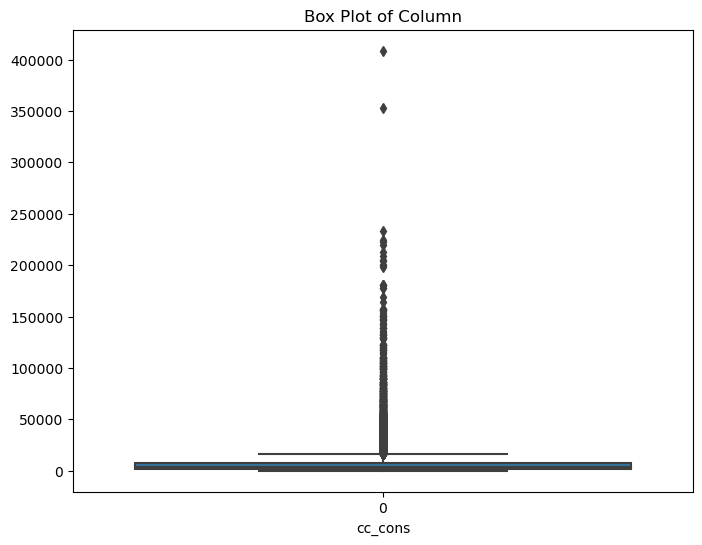

In [25]:
#Detect outliers using box plots 
plt.figure(figsize=(8, 6))
sns.boxplot(td1['cc_cons'])
plt.xlabel('cc_cons')
plt.title('Box Plot of Column')
plt.show()

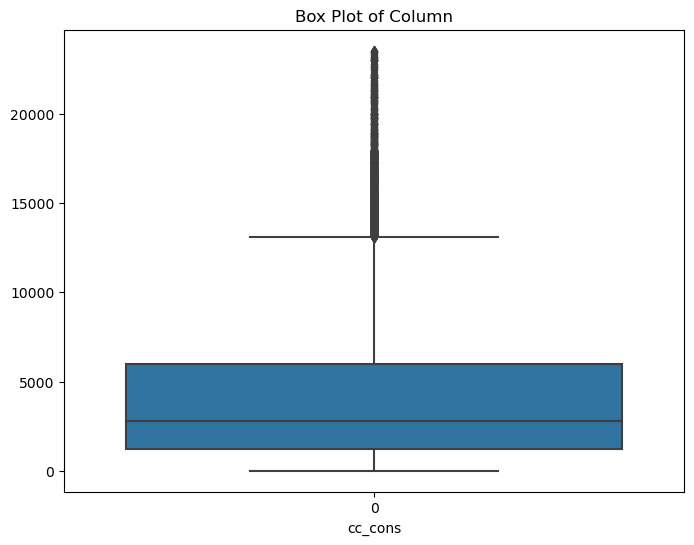

In [26]:
#Detect outliers using box plots 
plt.figure(figsize=(8, 6))
sns.boxplot(td3['cc_cons'])
plt.xlabel('cc_cons')
plt.title('Box Plot of Column')
plt.show()


In [27]:
td3.drop(columns=['account_type'],axis=1,inplace=True)
td3

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,20329,33,326,52702.00,988.72,29873.00,NaN,1087.000,2806.24,11.0,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
1,17679,44,264,10800.49,3215.52,21659.64,1607.0,1168.000,355.00,6.0,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
2,4340,26,233,53819.88,1371.00,4712.92,2220.0,1048.000,NaN,14.0,...,3.0,22.0,20603.0,31189.26,33183.13,7.0,31.0,20890.0,0.00,626
3,28060,30,683,1495.00,4237.00,2212.00,5292.0,1964.000,4237.83,1.0,...,4.0,24.0,24782.0,27984.33,81517.00,3.0,31.0,50000.0,0.00,2052
4,746,32,892,1847.00,5976.00,1347.80,4112.0,669.000,3056.00,2.0,...,3.0,19.0,30281.0,39320.36,34332.00,3.0,23.0,31663.0,0.00,434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30362,37183,68,654,2434.00,305.00,2477.70,NaN,5954.040,447.00,1.0,...,1.0,5.0,6000.0,9999.73,10086.00,2.0,9.0,10000.0,7029.78,3115
30363,39053,41,244,17968.60,NaN,24081.40,NaN,711.000,NaN,10.0,...,7.0,4.0,35000.0,114588.93,120377.00,4.0,8.0,57000.0,12822.26,9599
30364,17137,35,723,2649.36,3325.00,2451.97,738.0,2856.165,NaN,2.0,...,5.0,16.0,58000.0,62874.23,83175.00,4.0,6.0,40000.0,8291.82,3500
30365,37532,31,628,44107.74,NaN,24549.18,NaN,4328.000,NaN,35.0,...,1.0,5.0,28500.0,54108.81,90720.00,5.0,7.0,45000.0,0.00,7980


In [28]:
#Fill NaN by Median
for i in td3.columns:
    td3[i].fillna(td3[i].median(), inplace=True)

In [47]:
td3.skew()

id                       -0.001945
age                       5.032902
region_code              -0.335420
cc_cons_apr               5.906501
dc_cons_apr              14.269817
cc_cons_may               6.206818
dc_cons_may              12.642204
cc_cons_jun               5.923858
dc_cons_jun              15.986743
cc_count_apr             37.388141
cc_count_may              2.308551
cc_count_jun              2.057343
dc_count_apr              5.079631
dc_count_may              4.529737
dc_count_jun              3.970510
card_lim                  2.484119
debit_amount_apr         15.596564
credit_amount_apr        29.623703
debit_count_apr           1.716466
credit_count_apr          3.463928
max_credit_amount_apr    11.974220
debit_amount_may         23.170243
credit_amount_may        34.019115
credit_count_may          3.586729
debit_count_may           1.951402
max_credit_amount_may    51.202022
debit_amount_jun         87.348020
credit_amount_jun        93.005682
credit_count_jun    

In [34]:
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error  

X = td3.drop(columns=['cc_cons'])
y = td3['cc_cons']
y=np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(np.expm1(y_test),np.expm1(y_pred))
r2 = r2_score(np.expm1(y_test),np.expm1(y_pred))
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test),np.expm1(y_pred)))

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f'RMSLE: {rmsle}')


Mean Squared Error (MSE): 17804858.09790206
R-squared (R2) Score: 0.006375646998506457
RMSLE: 1.083352188715839


In [35]:
model.score(X_train, y_train)

0.34924722780764506

In [36]:
ts=pd.read_excel('test_9K3DBWQ_2aRGUxy.xlsx')

In [37]:
ts1=ts.copy()

In [38]:
ts1.drop(columns=['gender','loan_enq'],axis=1,inplace=True)
ts1

,id,account_type,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,6975,saving,36,447,17942.70,1170.00,1656.00,NaN,4551.000,NaN,...,15416.52,3.0,7.0,10000.0,17316.44,5154.00,2.0,8.0,5000.00,0.00
1,43223,current,31,233,44870.36,NaN,34177.00,NaN,25889.210,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,26,823,1073.00,2442.00,4141.00,390.0,6740.290,642.00,...,65227.00,4.0,22.0,26926.0,33981.00,37762.00,3.0,15.0,29352.00,2885.82
3,12368,current,39,878,33060.58,NaN,3797.12,NaN,291.000,NaN,...,63393.00,4.0,8.0,57185.0,52927.00,89425.00,7.0,11.0,32696.00,0.00
4,40415,current,44,404,18236.90,NaN,30513.30,NaN,20395.280,NaN,...,45120.00,1.0,5.0,45000.0,31656.69,34275.00,3.0,4.0,19000.00,3342.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,43209,current,39,233,9879.39,NaN,36383.63,NaN,29234.720,6890.29,...,62042.00,2.0,8.0,50000.0,248767.15,354953.20,18.0,43.0,195690.28,5810.98
14063,30134,saving,57,523,43138.00,NaN,23591.00,NaN,2557.000,NaN,...,296.00,1.0,1.0,156.0,4135.00,18568.09,3.0,2.0,18000.00,0.00
14064,2206,current,36,805,33225.34,NaN,100396.43,NaN,67072.385,1918.00,...,344234.00,16.0,33.0,100000.0,184900.48,134148.50,11.0,57.0,49139.00,5506.56
14065,22073,current,33,683,20338.54,611.00,17467.00,2042.0,5473.000,2583.00,...,43894.00,1.0,14.0,43816.0,44296.00,44135.00,12.0,28.0,40816.00,525.42


In [39]:
missing_values = ts1.isnull().sum()

total_rows = len(ts1)

percentage_missing = (missing_values / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

print(missing_data_summary)


                       Missing Values  Percentage Missing
investment_4                    13894           98.770171
vehicle_loan_active             13712           97.476363
investment_3                    13453           95.635175
investment_1                    13417           95.379256
vehicle_loan_closed             13386           95.158882
investment_2                    13040           92.699225
personal_loan_active            12933           91.938580
personal_loan_closed            12808           91.049975
dc_cons_jun                      9064           64.434492
dc_cons_apr                      8230           58.505723
dc_count_apr                     8230           58.505723
dc_count_may                     7375           52.427668
dc_cons_may                      7375           52.427668
dc_count_jun                     6552           46.577095
max_credit_amount_may            1495           10.627710
credit_amount_may                1495           10.627710
credit_amount_

In [40]:
#dropping the columns with more than 90% missing values
ts1.drop(columns= ['investment_4', 'vehicle_loan_active', 'investment_3', 'investment_1', 'vehicle_loan_closed', 'investment_2', 'personal_loan_active', 'personal_loan_closed' ] , axis = 1 , inplace = True)
ts1.head()

,id,account_type,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,6975,saving,36,447,17942.70,1170.0,1656.00,NaN,4551.00,NaN,...,15416.52,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,0.00
1,43223,current,31,233,44870.36,NaN,34177.00,NaN,25889.21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,26,823,1073.00,2442.0,4141.00,390.0,6740.29,642.0,...,65227.00,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,2885.82
3,12368,current,39,878,33060.58,NaN,3797.12,NaN,291.00,NaN,...,63393.00,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,0.00
4,40415,current,44,404,18236.90,NaN,30513.30,NaN,20395.28,NaN,...,45120.00,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,3342.58


In [41]:
ts2=ts1.copy()

In [42]:
ts2.drop(columns=['account_type'],axis=1,inplace=True)
ts2

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,6975,36,447,17942.70,1170.00,1656.00,NaN,4551.000,NaN,6.0,...,15416.52,3.0,7.0,10000.0,17316.44,5154.00,2.0,8.0,5000.00,0.00
1,43223,31,233,44870.36,NaN,34177.00,NaN,25889.210,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,26,823,1073.00,2442.00,4141.00,390.0,6740.290,642.00,3.0,...,65227.00,4.0,22.0,26926.0,33981.00,37762.00,3.0,15.0,29352.00,2885.82
3,12368,39,878,33060.58,NaN,3797.12,NaN,291.000,NaN,16.0,...,63393.00,4.0,8.0,57185.0,52927.00,89425.00,7.0,11.0,32696.00,0.00
4,40415,44,404,18236.90,NaN,30513.30,NaN,20395.280,NaN,42.0,...,45120.00,1.0,5.0,45000.0,31656.69,34275.00,3.0,4.0,19000.00,3342.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,43209,39,233,9879.39,NaN,36383.63,NaN,29234.720,6890.29,18.0,...,62042.00,2.0,8.0,50000.0,248767.15,354953.20,18.0,43.0,195690.28,5810.98
14063,30134,57,523,43138.00,NaN,23591.00,NaN,2557.000,NaN,2.0,...,296.00,1.0,1.0,156.0,4135.00,18568.09,3.0,2.0,18000.00,0.00
14064,2206,36,805,33225.34,NaN,100396.43,NaN,67072.385,1918.00,39.0,...,344234.00,16.0,33.0,100000.0,184900.48,134148.50,11.0,57.0,49139.00,5506.56
14065,22073,33,683,20338.54,611.00,17467.00,2042.0,5473.000,2583.00,26.0,...,43894.00,1.0,14.0,43816.0,44296.00,44135.00,12.0,28.0,40816.00,525.42


In [43]:
ts3=ts2.copy()

In [44]:
#Fill NaN by Median
for i in ts3.columns:
    ts3[i].fillna(ts3[i].median(), inplace=True)

In [45]:
y_pred_ts3=model.predict(ts3)

In [46]:
y_pred_ts3=np.expm1(y_pred_ts3)

In [48]:
submission = pd.DataFrame({'id': ts3['id'],'cc_cons':y_pred_ts3})
submission.to_csv('submission_Final.csv',index= False)